In [1]:
#Nicolas's Project 3 
#In this project, I suppose an investor came to consult me that he has around $250,000 free money in his bank account and he decided to open a Chinese restaurant at Greater Toronto Area(Used to be Boston, but the Yelp dataset does not contain enough MA state data). What should he do to ensure the business go successful, which is defined as short breakeven time and high investment return rate? Since I am a data scientist, I will use the Yelp Dataset to analysis and return a decent and achievable business suggestion plan to him.
#The Yelp dataset is a subset of Yelp businesses, reviews, and user data for use in personal, educational, and academic purposes. It is available as JSON files.  (https://www.yelp.com/dataset) The dataset contains 3 main business files: business.json, review.json and user.json. Business.json contains business data including location data, attributes, and categories. Review.json contains full review text data including the user_id that wrote the review and the business_id the review is written for. User.json includes the user's friend mapping and all the metadata associated with the user.
#Currently, my algorithm will mainly focus on business.json file. Although it contains 192,609 businesses and takes 8.69 gigabytes uncompressed, most of the data is irrelevant to my project based on the wrong location. To clean the data, I would first delete lines with “state” attributes not equal to “MA” and then select the lines with “city” attributes equal to Boston area (Boston, Cambridge, Medford, Allston, Quincy, Malden and so on). After that, I need to select all the Chinese restaurant by attributes “categories”. Since there are different style Chinese restaurants, Yelp defined 13 different categories for them (Cantonese/ Congee/ Dim Sum/ Fuzhou/ Hainan/ Hakka/ Henghwa/ Hokkien/ Hunan/ Pekinese/ Shanghainese/ Szechuan/ Teochew).
#After the date getting cleaned, we will have a dataset of Boston area Chinese restaurant. And then, I am going to find all the successful restaurant under $250,000 initial investment and analyze the characteristics and commonalities of these restaurants. To find successful restaurant, I will collect merchants with high ratings (4 or 5 stars) and the number of comments is greater than a certain value (e.g. review_count > 50 ). To decide whether these restaurant’s initial investment is lower than $250,000, I will look at the location, search the rent price, device and employees needed.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


# 0. Variable description table from Kaggle

Variable Name ------------ Description ------------ Encoding
business_id    id of business in Yelp system 
name           name of business
neighborhood   neighborhood of business
address        address of business
city           city of business
state          state of the location
postal_code    zip code
latitude       latitude
longitude      longitude
stars          review star from 1.0-5.0
review_count   total number of review count
is_open        if still open
categories     category of the business

# 1. Data Importing

In [4]:
#The code loads the Yelp dataset(business information) "test.csv" into the dataframe. 
#It prints first 5 rows of the dataset to preview using .head() function and shows the datatype of the cells using .info()
d = pd.read_csv('test.csv')
print(d.head())

              business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars review_count is_open  \
0  33.330690 -111.978599    4.0           22       1   
1  40.291685  -80.104900    

/Users/Fanyiwen/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#It also shows the datatypes of each rows of the dataset to preview using .head() function
print(d.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174544 entries, 0 to 174543
Data columns (total 13 columns):
business_id     174544 non-null object
name            174544 non-null object
neighborhood    68009 non-null object
address         174544 non-null object
city            174543 non-null object
state           174543 non-null object
postal_code     173922 non-null object
latitude        174543 non-null float64
longitude       174543 non-null float64
stars           174544 non-null float64
review_count    174544 non-null object
is_open         174543 non-null object
categories      174542 non-null object
dtypes: float64(3), object(10)
memory usage: 17.3+ MB
None


In [6]:
# define Dataset's DataFrame
df = pd.DataFrame(d)
print(df.head())

              business_id                        name neighborhood  \
0  FYWN1wneV18bWNgQjJ2GNg          "Dental by Design"          NaN   
1  He-G7vWjzVUysIKrfNbPUQ       "Stephen Szabo Salon"          NaN   
2  KQPW8lFf1y5BT2MxiSZ3QA     "Western Motor Vehicle"          NaN   
3  8DShNS-LuFqpEWIp0HxijA          "Sports Authority"          NaN   
4  PfOCPjBrlQAnz__NXj9h_w  "Brick House Tavern + Tap"          NaN   

                            address            city state postal_code  \
0        "4855 E Warner Rd, Ste B9"       Ahwatukee    AZ       85044   
1              "3101 Washington Rd"        McMurray    PA       15317   
2          "6025 N 27th Ave, Ste 1"         Phoenix    AZ       85017   
3  "5000 Arizona Mills Cr, Ste 435"           Tempe    AZ       85282   
4                    "581 Howe Ave"  Cuyahoga Falls    OH       44221   

    latitude   longitude  stars review_count is_open  \
0  33.330690 -111.978599    4.0           22       1   
1  40.291685  -80.104900    

# 2. Data Cleaning

In [7]:
#select all of the business localed at Greater Toronto Area
#Greater Toronto Area(GTA) includes: Ajax, Brampton, Burlington, Markham, Mississauga, Newmarket, Oakville, Oshawa, Pickering, Richmond Hill, Vaughan, Whitby
GTA = (df.loc[df['city'].isin(['Ajax', 'Brampton', 'Burlington', 'Markham','Toronto','Mississauga', 'Newmarket', 'Oakville', 'Oshawa', 'Pickering', 'Richmond Hill', 'Vaughan', 'Whitby'])])

#select the Chineses restaurant localed at Greater Toronto Area
df_GTA = pd.DataFrame(GTA)
GTA_chinese =  (df_GTA.loc[df['categories'].isin(['Chinese'])])
print(GTA_chinese)
#There are 439 Chinese restaurants around Greater Toronto Area


                   business_id                                    name  \
248     Rh2smrKvcamnP8VBUgMI0Q       "Dim Sum King Seafood Restaurant"   
672     7U23rwCmVWasFQ0cHRMYVw                               "China 8"   
1329    KXl2k4LkrmnHRTTAY-TVDQ                     "Bombay Chopsticks"   
1467    0BeKOp6cWw4ArB04lnyBYw         "Yummy Chinese Food Restaurant"   
2073    CPcy22Hd2F7z0EKG66FMRA                         "The Old House"   
3534    W_nU2qtu1AEDDCgkCo0gJg                    "Phoenix Restaurant"   
3815    _YoPC6DmYegxbPiKIoAKoA              "Hunan Restaurant and Bar"   
3924    -IsUvuuWTPSNRTTdsVg3dA          "Yuan Yuan Chinese Restaurant"   
4518    3peFkW4ohXXYq6_yFNvNgA                         "Golden Dragon"   
5091    tpmMELSsUxS2x1FdM6k9nQ                    "Wu's Garden Buffet"   
5161    m9Af3YFkBLpPVAzknELTxA                             "Jing Thai"   
5456    Si_gSXVFFD8MxjtQhlIGdA                    "Ace Canton Kitchen"   
5732    QNjgoQsJyEv07XSNumolmw        

In [8]:
# After selecting these 439 Chinese restaurants, I need to further clean the data by removing irrelevant columns like business_id
def further_cleaning(data):
    columns_needed = ['name', 'neighborhood', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open']
    clean_data = GTA_chinese[columns_needed]
    return clean_data

GTA_chinese = further_cleaning(GTA_chinese)
GTA_chinese.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 421 entries, 248 to 173842
Data columns (total 11 columns):
name            421 non-null object
neighborhood    264 non-null object
address         421 non-null object
city            421 non-null object
state           421 non-null object
postal_code     421 non-null object
latitude        421 non-null float64
longitude       421 non-null float64
stars           421 non-null float64
review_count    421 non-null object
is_open         421 non-null object
dtypes: float64(3), object(8)
memory usage: 39.5+ KB


In [9]:
#Another Dataset - yelp_business_hours
#To learn more about a restaurant, we introduced the operating hours of the yelp merchants to see how the open hours of the selected 439 restaurants were. So to investigate whether the popularity of Chinese restaurants is related to how long they are open every day.
#Link of the yelp dataset business hours are available on the same website (https://www.kaggle.com/yelp-dataset/yelp-dataset/version/4#yelp_business_hours.csv)

In [10]:
d = pd.read_csv('yelp_business_hours.csv')
print(d.head())

              business_id     monday    tuesday  wednesday   thursday  \
0  FYWN1wneV18bWNgQjJ2GNg  7:30-17:0  7:30-17:0  7:30-17:0  7:30-17:0   
1  He-G7vWjzVUysIKrfNbPUQ   9:0-20:0   9:0-20:0   9:0-20:0   9:0-20:0   
2  KQPW8lFf1y5BT2MxiSZ3QA       None       None       None       None   
3  8DShNS-LuFqpEWIp0HxijA  10:0-21:0  10:0-21:0  10:0-21:0  10:0-21:0   
4  PfOCPjBrlQAnz__NXj9h_w   11:0-1:0   11:0-1:0   11:0-1:0   11:0-1:0   

      friday   saturday     sunday  
0  7:30-17:0       None       None  
1   9:0-16:0   8:0-16:0       None  
2       None       None       None  
3  10:0-21:0  10:0-21:0  11:0-19:0  
4   11:0-1:0   11:0-2:0   11:0-0:0  


# 3. Data Analysis

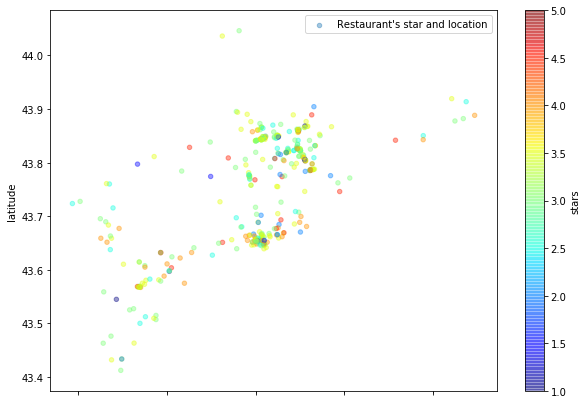

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#The graph show the distribution of the Chinese restaurant at greater toronto area with different star rates
#In the image, I used a latitude and longitude and a restaurant star to create a map of a Chinese restaurant in Toronto to show which areas of the high-quality Chinese restaurant are more concentrated.
GTA_chinese.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,colorbar=True,figsize=(10,7),c="stars",label="Restaurant's star and location",cmap=plt.get_cmap("jet") )
   
plt.show()


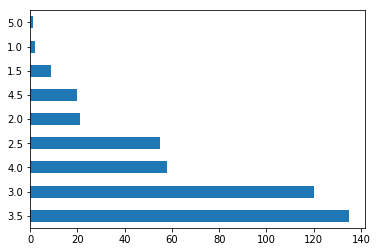

In [16]:
#Among the many Chinese restaurants in Toronto, we clearly observed that 3.5 stars is the score of most Chinese restaurants. 
#As can be seen from the figure, the Chinese restaurant's score on the yelp platform is normally distributed.
GTA_chinese['stars'].value_counts().plot(kind='barh')

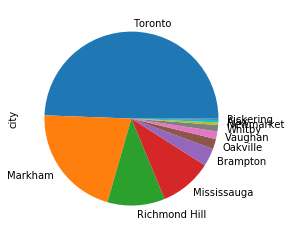

In [22]:
#The vast majority of Chinese restaurants near Toronto are concentrated in four areas: Toronto City, Markham, Richmond Hill and Mississauga. 
#The city of Toronto is well-understood as a population gathering place. Markham, Richmond Hill and Mississauga have become a gathering place for Chinese people. 
#The relatively low rents and mature university districts have become the choice of more and more Chinese restaurants.
GTA_chinese['city'].value_counts().plot(kind='pie')

In [31]:
# Names of Chinese restaurant with at least 4 stars
# We can judge the main business direction of a restaurant by making a name for a good restaurant (making noodles, hot pot or Sichuan cuisine, etc.)
# Another common way to name is to use the place name to showcase the specialties of the restaurant, such as Hong Kong Bistro Cafe and Peking Duck Kitchen. These kind of restaurants' owners usually is older than 45 years old.
#Younger generations of food and beverage entrepreneurs prefer to name the restaurant in a romantic and indirect way, whether the restaurant itself offers traditional food or innovative fusion dishes.
selected_GTA_chinese =  GTA_chinese.loc[(df['stars']>=4)]
print(selected_GTA_chinese['name'])


6809                                  "Asia Hut"
9416                         "Delights of China"
9466      "South Sea Village Chinese Restaurant"
11626                          "Original Congee"
12731               "Beijing Hot Pot Restaurant"
16787                       "Lemongrass Kitchen"
17380                    "Hong Kong Bistro Cafe"
17752                           "Ming's Noodles"
20233                               "M&Y Bakery"
22715                           "Orient Express"
26568                    "Number Two Restaurant"
27354                         "Ling Long Legend"
28139                    "Family Dumpling House"
29477                       "Fudao noodle house"
31314                    "Lion Pavilion Hot Pot"
34921                "Northern Dumpling Kitchen"
35026                         "The Green Dragon"
37094                        "Lin's Chinese Bun"
43110                       "Wonton Chai Noodle"
46341                                "Cafe No 8"
50711               

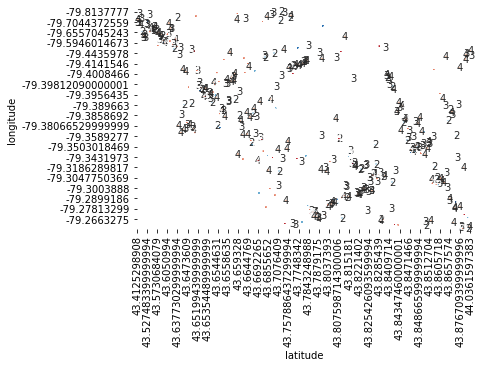

In [37]:
sns.heatmap(GTA_chinese.groupby(['longitude', 'latitude'])['stars'].mean().unstack(),
            annot=True, cbar=False, fmt='.0f', cmap='RdBu_r')

# Machine learning
reference: https://github.com/skipgram/modern-nlp-in-python
In this part, I will use machine learning to study what users are saying about Chinese restaurants in yelp.